In [85]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [86]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [87]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/PotatoDisease/data',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE)
    
)

Found 2152 files belonging to 3 classes.


In [88]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [89]:
len(dataset)

68

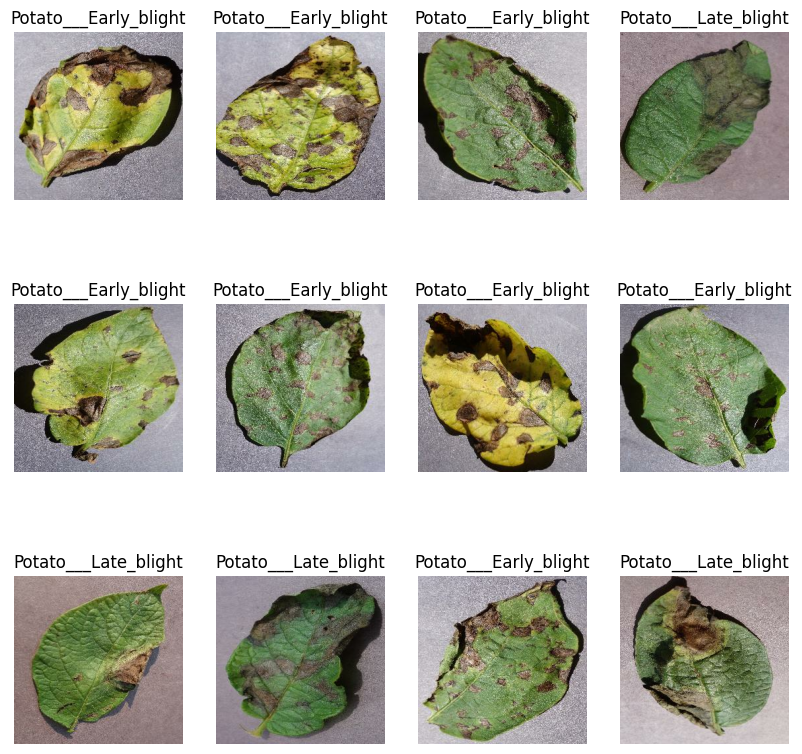

In [90]:
#Display The Random Images
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [91]:
dataset
len(dataset)

68

In [92]:
# 80% ==> traning
# 20%==> 10% validation, 10% test

In [93]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [94]:
train_ds = dataset.take(54)
len(train_ds)

54

In [95]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [96]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [97]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [98]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [99]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return(train_ds,val_ds,test_ds)

In [100]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [101]:
len(train_ds)

54

In [102]:
len(val_ds)

6

In [103]:
len(test_ds)

8

In [104]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [105]:
resize_and_rescale= tf.keras.Sequential([
   tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
   tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)])

In [106]:
data_agumentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])

In [110]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu', input_shape=input_shape ),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [111]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_16 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [112]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [113]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 205s 3s/step - loss: 0.8599 - accuracy: 0.5787 - val_loss: 0.5892 - val_accuracy: 0.7448
Epoch 2/50
54/54 [==============================] - 162s 3s/step - loss: 0.4606 - accuracy: 0.8252 - val_loss: 0.2407 - val_accuracy: 0.9062
Epoch 3/50
54/54 [==============================] - 162s 3s/step - loss: 0.3277 - accuracy: 0.8663 - val_loss: 0.2710 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 159s 3s/step - loss: 0.2417 - accuracy: 0.9132 - val_loss: 0.0999 - val_accuracy: 0.9635
Epoch 5/50
54/54 [==============================] - 161s 3s/step - loss: 0.1709 - accuracy: 0.9323 - val_loss: 0.0870 - val_accuracy: 0.9740
Epoch 6/50
54/54 [==============================] - 159s 3s/step - loss: 0.1918 - accuracy: 0.9282 - val_loss: 0.0975 - val_accuracy: 0.9635
Epoch 7/50
54/54 [==============================] - 159s 3s/step - loss: 0.1806 - accuracy: 0.9311 - val_loss: 0.0572 - val_accuracy: 0.9896
Epoch 8/50
54

In [114]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 690ms/step - loss: 0.0434 - accuracy: 0.9805


In [115]:
scores

[0.04341692849993706, 0.98046875]

In [116]:
history

In [117]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [118]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [121]:
history.history['accuracy']

[0.5787037014961243,
 0.8252314925193787,
 0.8663194179534912,
 0.9131944179534912,
 0.9322916865348816,
 0.9282407164573669,
 0.9311342835426331,
 0.9380787014961243,
 0.9415509104728699,
 0.9392361044883728,
 0.9589120149612427,
 0.9484953880310059,
 0.9502314925193787,
 0.9386574029922485,
 0.9693287014961243,
 0.96875,
 0.9629629850387573,
 0.9670138955116272,
 0.9635416865348816,
 0.9554398059844971,
 0.9768518805503845,
 0.96875,
 0.9780092835426331,
 0.9820601940155029,
 0.9756944179534912,
 0.9791666865348816,
 0.9785879850387573,
 0.9704861044883728,
 0.9837962985038757,
 0.9791666865348816,
 0.984375,
 0.9861111044883728,
 0.9785879850387573,
 0.9849537014961243,
 0.9907407164573669,
 0.9739583134651184,
 0.9872685074806213,
 0.9866898059844971,
 0.9768518805503845,
 0.9890046119689941,
 0.9918981194496155,
 0.9878472089767456,
 0.984375,
 0.984375,
 0.9803240895271301,
 0.9878472089767456,
 0.9832175970077515,
 0.9895833134651184,
 0.9924768805503845,
 0.9861111044883728]

In [122]:
#Stored Array in a variables
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

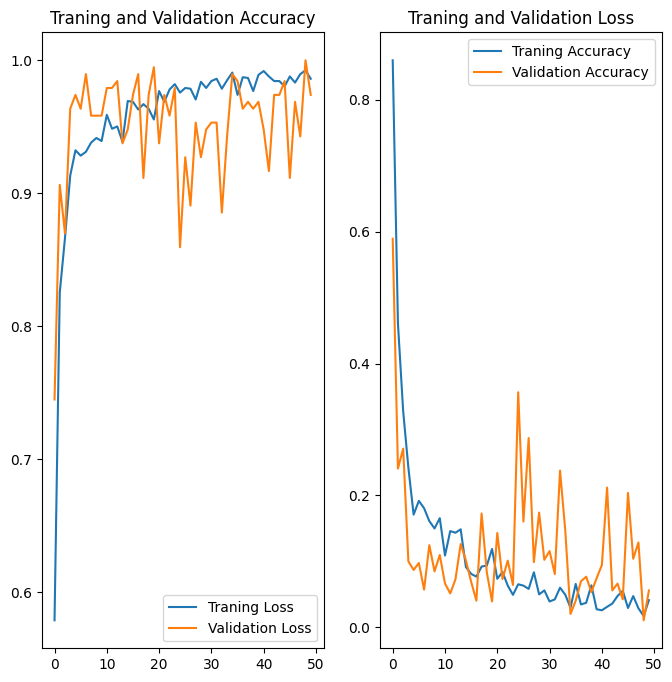

In [126]:
# Plot the Graph of traning and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),acc,label='Traning Loss')
plt.plot(range(EPOCHS),val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Traning and Validation Accuracy')

#loss Chart

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),loss,label='Traning Accuracy')
plt.plot(range(EPOCHS),val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Traning and Validation Loss')
plt.show()

In [133]:
import numpy as np

First Image to Predict
First Image's actual label Potato___Early_blight
1/1 [==============================] - 1s 944ms/step
predication label Potato___Early_blight


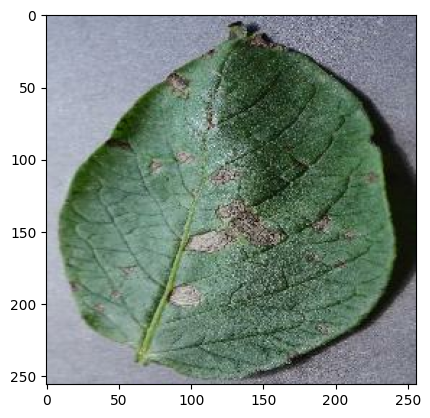

In [137]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First Image to Predict")
    plt.imshow(first_image)
    print("First Image's actual label",class_names[first_label])
    
    batch_predication = model.predict(image_batch)
    print("predication label",class_names[np.argmax(batch_predication[0])])

In [139]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #crreate batch
    
    predications = model.predict(img_array)
    
    predict_class = class_names[np.argmax(predications[0])]
    confidance = round(100 * (np.max(predications)),2)
    return predict_class, confidance

1/1 [==============================] - 0s 64ms/step


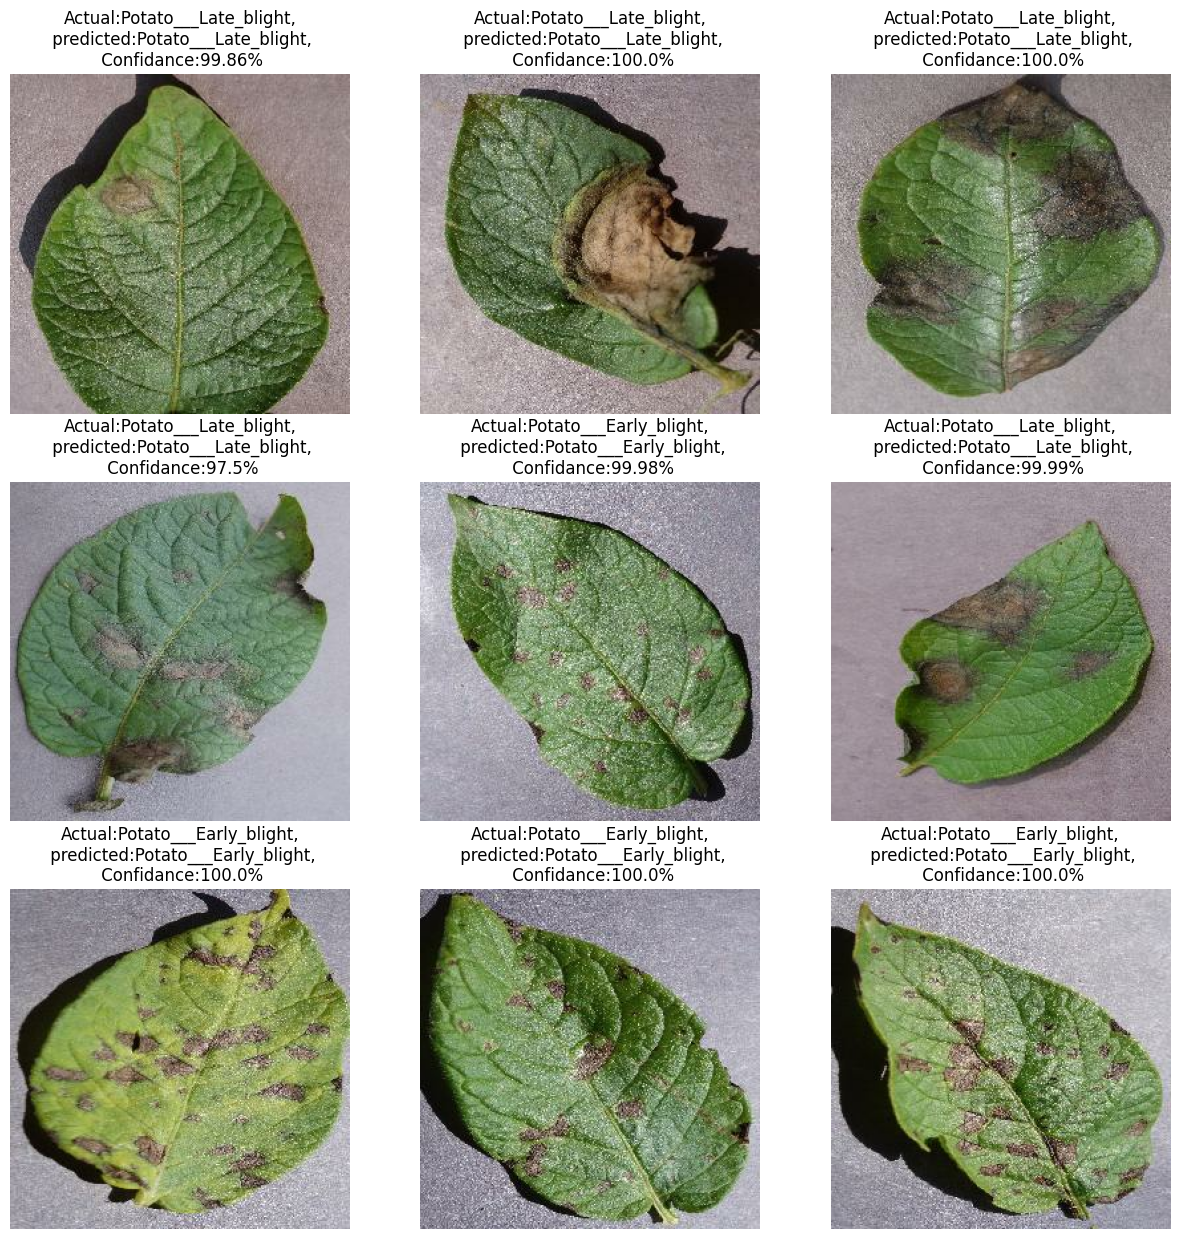

In [144]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidance = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class},\n Confidance:{confidance}%")
        plt.axis("off")

In [146]:
import os
model_version=max([int(i) for i in os.listdir("D:/PotatoDisease/models") + [0]])+1
model.save(f"D:/PotatoDisease/models/{model_version}")

INFO:tensorflow:Assets written to: D:/PotatoDisease/models/1\assets


INFO:tensorflow:Assets written to: D:/PotatoDisease/models/1\assets
